# CDC WONDER API Example
[CDC WONDER](https://wonder.cdc.gov/) is a query tool from the Centers for Disease Control (CDC) that provides access to a collection of online databases for the analysis of public health data. 

The following are a sampling of databases available through WONDER that provide vital statistics data through CDC's National Center for Health Statistics

* [Births](https://wonder.cdc.gov/natality.html)
* [Detailed Mortality](https://wonder.cdc.gov/ucd-icd10.html)
* [Compressed Mortality](https://wonder.cdc.gov/mortSQL.html)
* [Multiple cause of death](https://wonder.cdc.gov/mcd.html)
* [Infant Deaths](https://wonder.cdc.gov/lbd.html)

For this example, we will focus on the [Detailed Mortality](https://wonder.cdc.gov/ucd-icd10.html) database, which provides counts or rates (crude or age-adjusted) for underlying cause of death at the national, state and county levels. Using the query tool, the user can select grouping and filtering variables that are use to generate a dataset. Results are provided as a data table which can then be exported to a tab delimited file or visualized.

WONDER provides an API that allows the same queries to be issued through a POST request to WONDER's web server. Requests and responses are issued in XML format and are detailed in the [API Documentation](https://wonder.cdc.gov/wonder/help/WONDER-API.html) page. 

Each XML request consists of a series of parameter tags with name and value children in the following format:

```
<request-parameters>
    <parameter>
        <name></name>
        <value></value>
    <parameter>
    ...
</request-parameters>
```

A reference of parameter names and values can be found on [CDC WONDER Wiki page](https://loyola.campuspack.net/Groups/17FA_CS-703-501/Pet_API#/page/364768481#referenceParameters)

In [1]:
# by-variables" or those parameters selected in the "Group Results By" and the "And By" drop-down lists 
# in the "Request Form." These "by-variables" are the cross-tabulations, stratifications or indexes 
# to the query results. Expect the results data table to show a row for each category in the by-variables, 
# and a column for each measure. For example, if you wish to compare data by sex, then "group results by" gender, 
# to get a row for females and a row for males in the output.
# M_ are measures to return, the default measures plus any optional measures.

# For this example, will group by year and race

b_parameters = {
    "B_1": "D76.V1-level1", 
    "B_2": "D76.V8", 
    "B_3": "*None*", 
    "B_4": "*None*", 
    "B_5": "*None*"
}

In [2]:
# measures to return, the default measures plus any optional measures

# For this example, include deaths, population, and crude rate

m_parameters = {
    "M_1": "D76.M1",   # Deaths, must be included
    "M_2": "D76.M2",   # Population, must be included
    "M_3": "D76.M3",   # Crude rate, must be included
    #"M_31": "D76.M31",        # Standard error (crude rate)
    #"M_32": "D76.M32"         # 95% confidence interval (crude rate)
    "M_41": "D76.M41", # Standard error (age-adjusted rate)
    "M_42": "D76.M42"  # 95% confidence interval (age-adjusted rate)
}

In [3]:
# values highlighted in a "Finder" control for hierarchical lists, 
# such as the "Regions/Divisions/States/Counties hierarchical" list.

# For this example, include all years, months, census regions, hhs regions, states. Only include ICD-10 K00-K92
# for disease of the digestive system

f_parameters = {
    "F_D76.V1": ["*All*"], # year/month
    "F_D76.V10": ["*All*"], # Census Regions - dont change
    "F_D76.V2": ["K00-K92"], # ICD-10 Codes
    "F_D76.V27": ["*All*"], # HHS Regions - dont change
    "F_D76.V9": ["*All*"] # State County - dont change
}

In [4]:
# contents of the "Currently selected" information areas next to "Finder" controls in the "Request Form."

# For this example, include all dates, census regions, hhs regions, and states.
# Only include ICD-10 code K00-K92 for disease of the digestive system

i_parameters = {
    "I_D76.V1": "*All* (All Dates)",  # year/month
    "I_D76.V10": "*All* (The United States)", # Census Regions - dont change
    "I_D76.V2": "K00-K92 (Diseases of the digestive system)", # ICD-10 Codes
    "I_D76.V27": "*All* (The United States)", # HHS Regions - dont change
    "I_D76.V9": "*All* (The United States)" # State County - dont change
}

In [5]:
# variable values to limit in the "where" clause of the query, found in multiple select 
# list boxes and advanced finder text entry boxes in the "Request Form."

# For this example, we want to include ten-year age groups for ages 15-44.
# For all other categories, include all values

v_parameters = {
    "V_D76.V1": "",         # Year/Month
    "V_D76.V10": "",        # Census Regions
    "V_D76.V11": "*All*",   # 2006 Urbanization
    "V_D76.V12": "*All*",   # ICD-10 130 Cause List (Infants)
    "V_D76.V17": "*All*",   # Hispanic Origin
    "V_D76.V19": "*All*",   # 2013 Urbanization
    "V_D76.V2": "",         # ICD-10 Codes
    "V_D76.V20": "*All*",   # Autopsy
    "V_D76.V21": "*All*",   # Place of Death
    "V_D76.V22": "*All*",   # Injury Intent
    "V_D76.V23": "*All*",   # Injury Mechanism and All Other Leading Causes
    "V_D76.V24": "*All*",   # Weekday
    "V_D76.V25": "*All*",   # Drug/Alcohol Induced Causes
    "V_D76.V27": "",        # HHS Regions
    "V_D76.V4": "*All*",    # ICD-10 113 Cause List
#     "V_D76.V5": ["15-24", "25-34", "35-44"], # Ten-Year Age Groups
    "V_D76.V5": "*All*",
#     "V_D76.V51": "*All*",   # Five-Year Age Groups
    "V_D76.V51": ["45-49", "50-54", "55-59", "60-64"],
    "V_D76.V52": "*All*",   # Single-Year Ages
    "V_D76.V6": "00",       # Infant Age Groups
    "V_D76.V7": "*All*",    # Gender
    "V_D76.V8": "*All*",    # Race
    "V_D76.V9": ""          # State/County
}

In [6]:
# other parameters, such as radio buttons, checkboxes, and lists that are not data categories

# For this example, include age-adjusted rates, use ten-year age groups (D76.V5), use state location by default, 
# show rates per 100,000, use 2013 urbanization and use ICD-10 Codes (D76.V2) for cause of death category

o_parameters = {
    "O_V10_fmode": "freg",    # Use regular finder and ignore v parameter value
    "O_V1_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_V27_fmode": "freg",    # Use regular finder and ignore v parameter value
    "O_V2_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_V9_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_aar": "aar_std",       # age-adjusted rates
    "O_aar_pop": "0000",      # population selection for age-adjusted rates
    "O_age": "D76.V5",        # select age-group (e.g. ten-year, five-year, single-year, infant groups)
    "O_javascript": "on",     # Set to on by default
    "O_location": "D76.V9",   # select location variable to use (e.g. state/county, census, hhs regions)
    "O_precision": "1",       # decimal places
    "O_rate_per": "100000",   # rates calculated per X persons
    "O_show_totals": "false",  # Show totals for 
    "O_timeout": "300",
    "O_title": "Digestive Disease Deaths, by Age Group",    # title for data run
    "O_ucd": "D76.V2",        # select underlying cause of death category
    "O_urban": "D76.V19"      # select urbanization category
}

In [7]:
# values for non-standard age adjusted rates (see mortality online databases).

# For this example, these parameters are ignored as standard age adjusted rates are used

vm_parameters = {
    "VM_D76.M6_D76.V10": "",        # Location
    "VM_D76.M6_D76.V17": "*All*",   # Hispanic-Origin
    "VM_D76.M6_D76.V1_S": "*All*",  # Year
    "VM_D76.M6_D76.V7": "*All*",    # Gender
    "VM_D76.M6_D76.V8": "*All*"     # Race
}

In [8]:
# Miscellaneous hidden inputs/parameters usually passed by web form. These do not change.
misc_parameters = {
    "action-Send": "Send",
    "finder-stage-D76.V1": "codeset",
    "finder-stage-D76.V1": "codeset",
    "finder-stage-D76.V2": "codeset",
    "finder-stage-D76.V27": "codeset",
    "finder-stage-D76.V9": "codeset",
    "stage": "request"
}

In [9]:
def createParameterList(parameterList):
    """Helper function to create a parameter list from a dictionary object"""
    
    parameterString = ""
    
    for key in parameterList:
        parameterString += "<parameter>\n"
        parameterString += "<name>" + key + "</name>\n"
        
        if isinstance(parameterList[key], list):
            for value in parameterList[key]:
                parameterString += "<value>" + value + "</value>\n"
        else:
            parameterString += "<value>" + parameterList[key] + "</value>\n"
        
        parameterString += "</parameter>\n"
        
    return parameterString

In [10]:
xml_request = "<request-parameters>\n"
xml_request += createParameterList(b_parameters)
xml_request += createParameterList(m_parameters)
xml_request += createParameterList(f_parameters)
xml_request += createParameterList(i_parameters)
xml_request += createParameterList(o_parameters)
xml_request += createParameterList(vm_parameters)
xml_request += createParameterList(v_parameters)
xml_request += createParameterList(misc_parameters)
xml_request += "</request-parameters>"

In [11]:
import requests

url = "https://wonder.cdc.gov/controller/datarequest/D76"
response = requests.post(url, data={"request_xml": xml_request, "accept_datause_restrictions": "true"})

if response.status_code == 200:
    data = response.text
else:
    print("something went wrong")

In [12]:
# BeautifulSoup library facilitates parsing of XML response
import bs4 as bs

# This library faciliates 2-dimensional array operations and visualization
import pandas as pd

In [13]:
def xml2df(xml_data):
    """ This function grabs the root of the XML document and iterates over
        the 'r' (row) and 'c' (column) tags of the data-table
        Rows with a 'v' attribute contain a numerical value
        Rows with a 'l attribute contain a text label and may contain an
        additional 'r' (rowspan) tag which identifies how many rows the value
        should be added. If present, that label will be added to the following
        rows of the data table.
    
        Function returns a two-dimensional array or data frame that may be 
        used by the pandas library."""
    
    root = bs.BeautifulSoup(xml_data,"lxml")
    all_records = []
    row_number = 0
    rows = root.find_all("r")
    
    for row in rows:
        if row_number >= len(all_records):
            all_records.append([])
              
        for cell in row.find_all("c"):
            if 'v' in cell.attrs:
                try:
                    all_records[row_number].append(float(cell.attrs["v"].replace(',','')))
                except ValueError:
                    all_records[row_number].append(cell.attrs["v"])
            else:
                if 'r' not in cell.attrs:
                    all_records[row_number].append(cell.attrs["l"])
                else:
                
                    for row_index in range(int(cell.attrs["r"])):
                        if (row_number + row_index) >= len(all_records):
                            all_records.append([])
                            all_records[row_number + row_index].append(cell.attrs["l"])
                        else:
                            all_records[row_number + row_index].append(cell.attrs["l"])
                                           
        row_number += 1
    return all_records

In [14]:
data_frame = xml2df(data)

df = pd.DataFrame(data=data_frame, columns=["Year", "Race", "Deaths", "Population", "Crude Rate", "Age-adjusted Rate", "Age-adjusted Rate Standard Error"])

df.head()

,Year,Race,Deaths,Population,Crude Rate,Age-adjusted Rate,Age-adjusted Rate Standard Error
0,1999,American Indian or Alaska Native,210.0,1375207.0,15.3,17.2,1.2
1,1999,Asian or Pacific Islander,73.0,5813970.0,1.3,1.3,0.2
2,1999,Black or African American,1176.0,17026405.0,6.9,7.4,0.2
3,1999,White,5067.0,99715532.0,5.1,5.1,0.1
4,2000,American Indian or Alaska Native,213.0,1438695.0,14.8,16.4,1.1


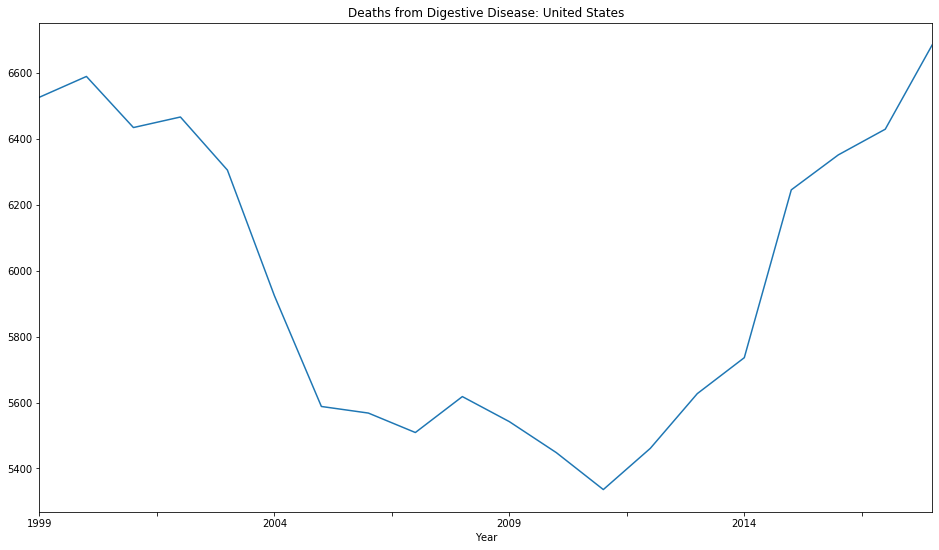

In [15]:
# Load matplotlib for plotting and instruct jupyter to display figures inline
from matplotlib import pyplot as plt
%matplotlib inline

# Group total number of deaths by year
df.groupby(by=['Year']).sum()['Deaths'].plot(title='Deaths from Digestive Disease: United States');
fig = plt.gcf()
fig.set_size_inches(16, 9)

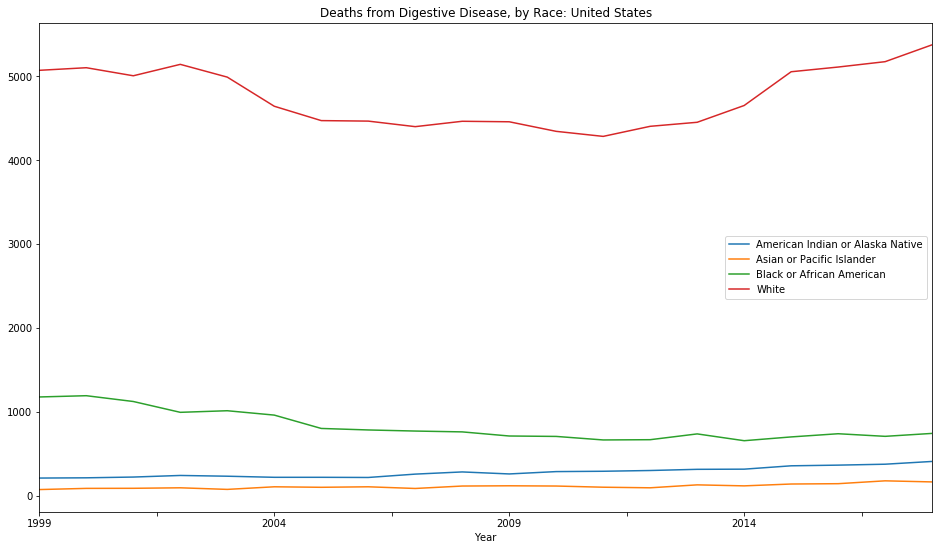

In [16]:
# Create mult-line chart for deaths by race 

# Store figure and axis for shared plot
fig, ax = plt.subplots()

# Store labels for all race groups
labels = []

# For each group in the groupby object, grab the 'Race' label and create a line plot for it
for key, grp in df.groupby(['Race']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Deaths')
    labels.append(key)

# Set the labels for each line using the group labels
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Configure chart size and title
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Deaths from Digestive Disease, by Race: United States");

In [17]:
# New query, this time we wish to group by year, month, and cause of death

b_parameters = {
    "B_1": "D76.V1-level1", # Year
    "B_2": "D76.V1-level2", # Month 
    "B_3": "D76.V2-level3 ",# Cause of death 
    "B_4": "*None*", 
    "B_5": "*None*"
}

f_parameters = {
    "F_D76.V1": ["*All*"], # year/month
    "F_D76.V10": ["*All*"], # Census Regions - dont change
    "F_D76.V2": ["X40","X41","X42","X43","X44","X60","X61","X62","X63","X64","X85","Y10","Y11","Y12","Y13","Y14"], 
        # ICD-10 Codes - Drug overdose deaths are identified using ICD–10 underlying cause-of-death codes: 
        # X40–X44, X60–X64, X85, and Y10–Y14.
    "F_D76.V27": ["*All*"], # HHS Regions - dont change
    "F_D76.V9": ["*All*"] # State County - dont change
}

v_parameters["V_D76.V5"] = "*All*"

In [18]:
xml_request = "<request-parameters>\n"
xml_request += createParameterList(b_parameters)
xml_request += createParameterList(m_parameters)
xml_request += createParameterList(f_parameters)
xml_request += createParameterList(i_parameters)
xml_request += createParameterList(o_parameters)
xml_request += createParameterList(vm_parameters)
xml_request += createParameterList(v_parameters)
xml_request += createParameterList(misc_parameters)
xml_request += "</request-parameters>"

In [19]:
url = "https://wonder.cdc.gov/controller/datarequest/D76"
response = requests.post(url, data={"request_xml": xml_request, "accept_datause_restrictions": "true"})

if response.status_code == 200:
    data = response.text
else:
    print("something went wrong")

In [20]:
data_frame = xml2df(data)

df = pd.DataFrame(data=data_frame, columns=["Year", "Month", "Cause of Death", "Deaths", "Population", "Crude Rate", "Age-adjusted Rate", "Age-adjusted Rate Standard Error"])

df.head()

,Year,Month,Cause of Death,Deaths,Population,Crude Rate,Age-adjusted Rate,Age-adjusted Rate Standard Error
0,1999,"Jan., 1999",Accidental poisoning by and exposure to nonopi...,19.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,1999,"Jan., 1999",Accidental poisoning by and exposure to antiep...,47.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,1999,"Jan., 1999",Accidental poisoning by and exposure to narcot...,460.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
3,1999,"Jan., 1999",Accidental poisoning by and exposure to other ...,4.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,1999,"Jan., 1999",Accidental poisoning by and exposure to other ...,370.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [21]:
df.groupby(by='Year').sum().head()

,Deaths
Year,
1999,16849.0
2000,17415.0
2001,19394.0
2002,23518.0
2003,25785.0


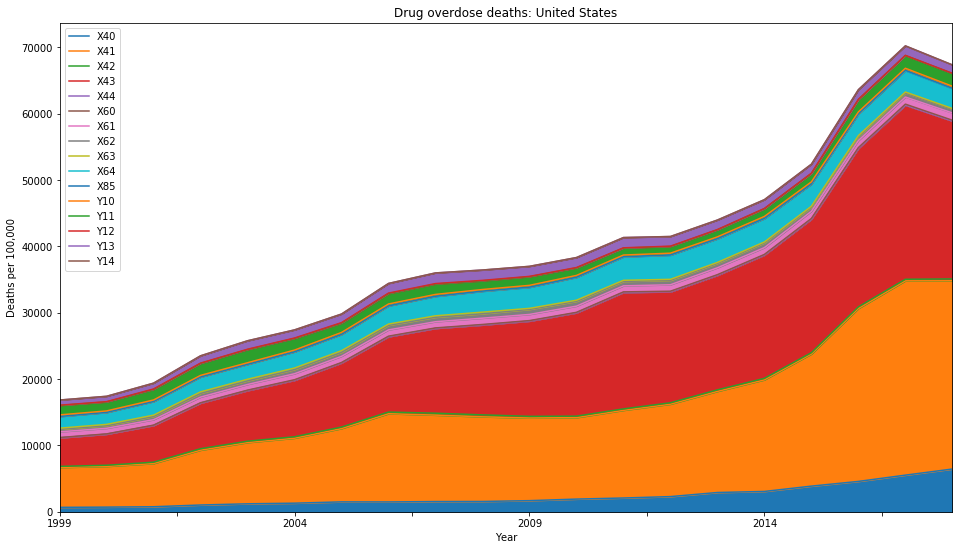

In [22]:
df_groups = df.groupby(by=['Year','Cause of Death'],as_index=False).sum()
df_pivot = df_groups.pivot(index='Year',columns='Cause of Death',values='Deaths')

ax = df_pivot.plot.area(title='Drug overdose deaths: United States')
legend_labels = ["X40","X41","X42","X43","X44","X60","X61","X62","X63","X64","X85","Y10","Y11","Y12","Y13","Y14"]
ax.legend(legend_labels);
ax.set_ylabel("Deaths per 100,000")
fig = plt.gcf()
fig.set_size_inches(16,9)